## ZEP Internship Task

### Initial Screening Task

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew,kurtosis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve
print('Import success')

Import success


### Selection of the Data Set

The data set we will use in this task is the **Student's Performance in Exam** obtained from **Kaggle**. The data set consists of the marks secured by the students in various subjects in anexam session. Lets start by importing the data set.

In [2]:
data = pd.read_csv('../input/students-performance-in-exams/exams.csv')

## 1. Data Visualization

#### Shape of our Dataset

In [3]:
data.shape

(1000, 8)

Our dataset contains 8 variables and 1000 observations.

Lets also visualize the first 5 observation of our data set.

In [4]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


From the first observation, we can see that our dataset contains 5 categorical variables and 3 quantitatives variables with the variable **gender** that can be considered as the **target** variable for our model if needs be.

We can verify the types of variables so as to confirm what we just observed as follows:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


We now have the confirmation that our dataset has indeed 5 categorical variables and 3 quatitatives variables.

#### Statistical Indicators

In [6]:
data.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [7]:
for i in data.select_dtypes(exclude=object):
    print(skew(data[i], axis=0, bias=True))

-0.15092066638673204
-0.19137735585974563
-0.15339027037241051


In [8]:
data.describe(include=['O'])

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,male,group C,some college,standard,none
freq,517,323,222,652,665


- **gender** : this variable have two unique values(modalities) with the modality **male** being mostly represented with a frequency of 517.
- **race/ethnicity** : this variable has 5 modalities with the modality **group C** being highly represented with 323 observations.
- **parental level of education** : this variable is composed of 6 unique values with the value **some college** mostly represented.
- **lunch** : has  two unique values, modality **standart** with a frequency of 652 is the one that is mostly represented.
- **test preparation course** : consiste of two unique values, **none** being the highest with a frequency of 665.
- Our three numerical variables **math score**, **reading score** and **writing score** are all just slightly skewed.


#### Missing values

Lets verify if our dataset contains missing values.

In [9]:
data.isnull().sum().sort_values(ascending=False)

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Our dataset does'nt contain any missing values which is great news for us, as such we don't bias to our dataset due to missing values imputations.

## 2. Exploratory Data Analysis

#### Uni variate analysis

#####  Quantitative Variables

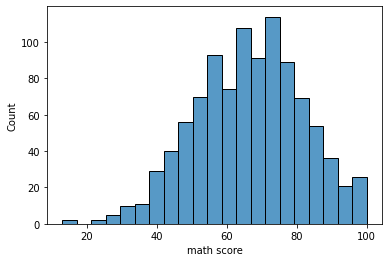

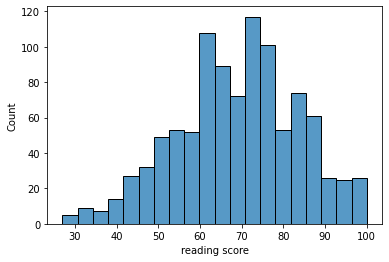

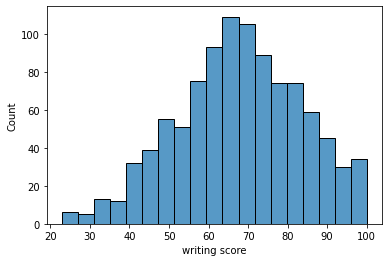

In [10]:
for i in data.select_dtypes(exclude=object):
    plt.figure()
    sns.histplot(data=data, x=i)

It comes out that:

- The notes in **math score** is concentrated between 50 and 80, with a very little part of the students scoring lower than 40 in the math test.
- The notes in **reading score** is concentrated between 60 and 80, with the minority scoring lower than 40 or greater than 90.
- The notes in **writing score** is concentrated between 60 and 75, less than 50 students scoring less than 40.

##### Categorical variables

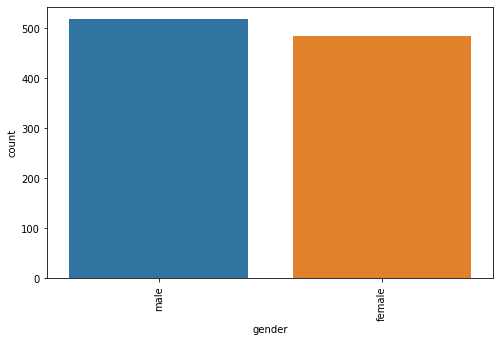

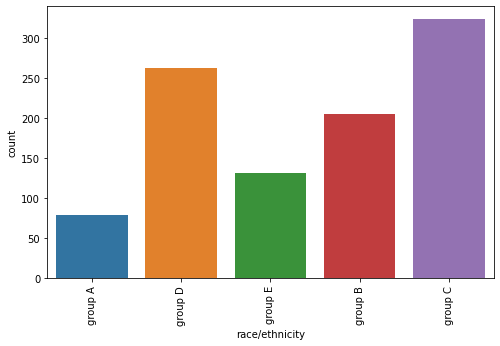

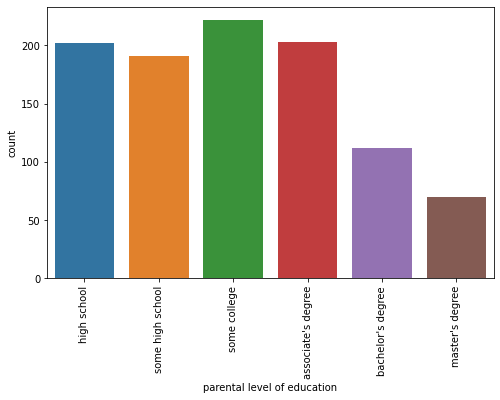

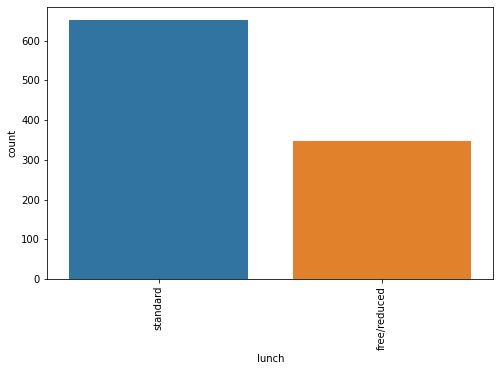

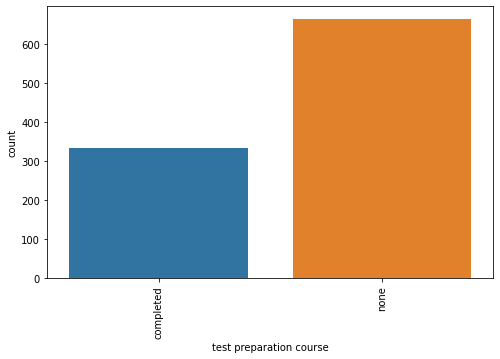

In [11]:
for i in data.select_dtypes(include=object):
    plt.figure(figsize=(8,5))
    plt.tick_params(axis='x', rotation=90)
    sns.countplot(data=data, x = i)

For the uni variate of the categorical varibales, we have:

- The number of male students is slightly greater than the female students
- The group C and Groupe D is greatly represented in the race/ethnicity compared to the others.
- Parents level of education is highly represented by **some college level** , **associate's degree** and **high school level**. A limited number of parents have **master's degree**.
- The majority of the students did'nt complete the test preparation course.

### Bi variate Analysis

#### Numeric - numeric variables analysis

When both the variables being compared have numeric data, the analysis is said to be Numeric-Numeric Analysis. To compare two numeric columns, you can use scatter plots, pair plots, and correlation matrices.


<AxesSubplot:xlabel='math score', ylabel='reading score'>

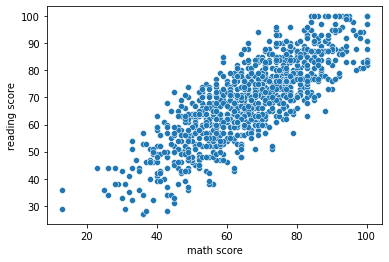

In [12]:
plt.figure()
sns.scatterplot(data=data, x = 'math score', y = 'reading score')

<AxesSubplot:xlabel='math score', ylabel='writing score'>

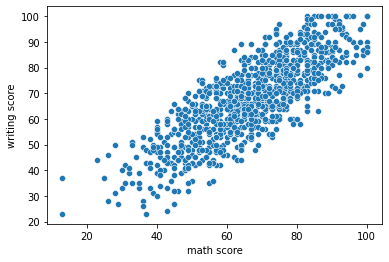

In [13]:
plt.figure()
sns.scatterplot(data=data, x = 'math score', y = 'writing score')

From the scatterplots, we can have the hypothesis that an increase in the **reading score** leads to an increase in the **math score**. Also an increase in the **writing score** also leads to an increase in the **math score**.

We can verify the hypthesis made here through the correlation matrix as follows:


<AxesSubplot:>

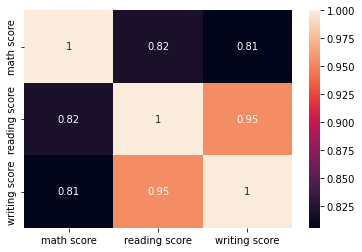

In [14]:
corr = data[['math score','reading score', 'writing score']].corr()
plt.figure()
sns.heatmap(corr, annot=True)

From the correlation matrix, we have the confirmation that the variable **reading score**, **writing score** and **math score** are highly correlated with one another, which means an increase in one leads to an increase to the other.

####  Categorical - Numeric variables analysis

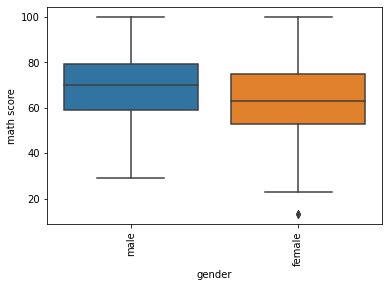

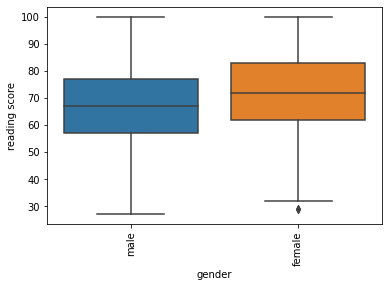

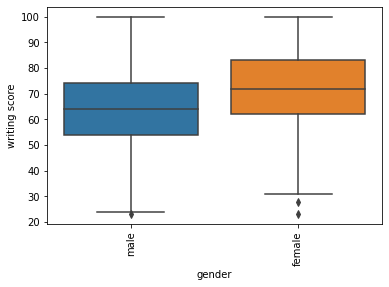

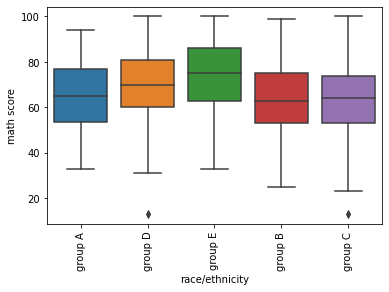

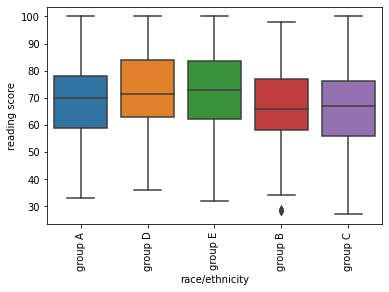

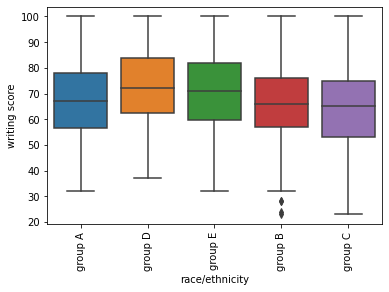

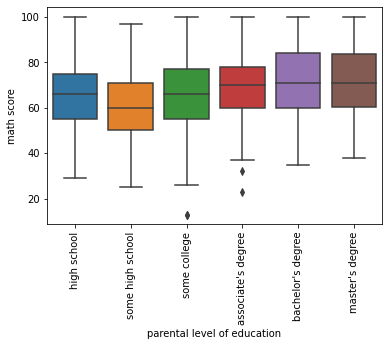

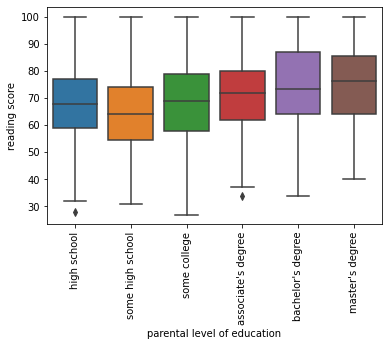

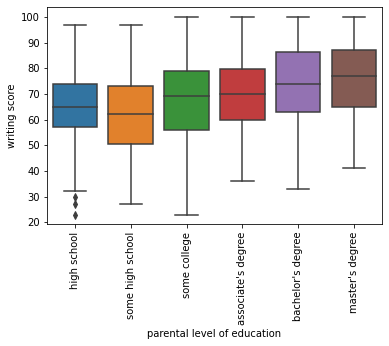

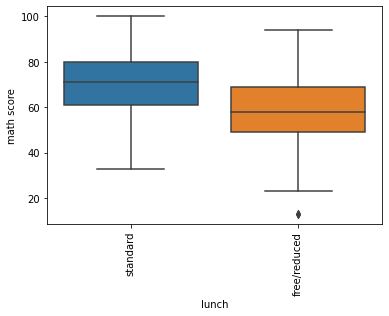

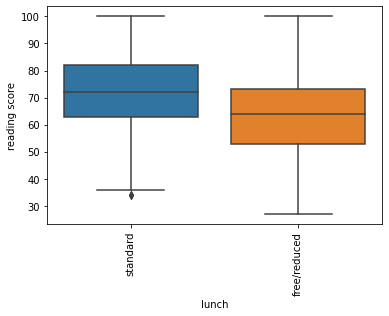

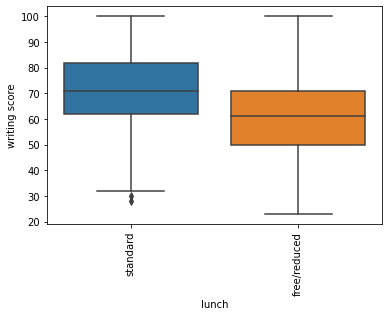

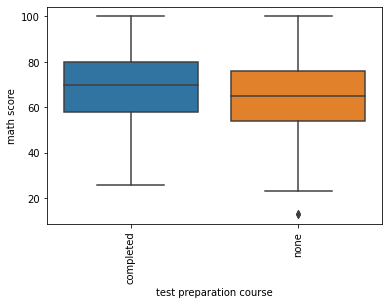

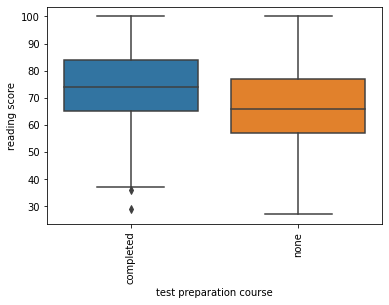

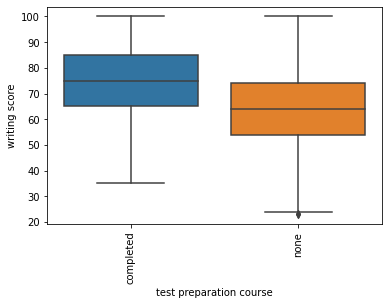

In [15]:
for i in data.select_dtypes(include=object):
    for j in data.select_dtypes(exclude=object):
        plt.figure()
        plt.tick_params(axis = 'x', rotation=90)
        sns.boxplot(x = i, y = j, data=data)

The aboves plots tells us that :

- Out of the three scores, male students scored better females only during the math score, where as the female strudents scored better in both **reading score** and **writing score**
- More the parents education level are high better the scoring of the student, with students whose parents have masters degrees level scoring the best.
- Students having a standart lunch score better than students that took free lunch
- Students that have taken the test preparation course have a greater scoring in all 3 than the students that did'nt.

#### Categorical - categorical variables analysis

When both the variables contain categorical data, we perform categorical-categorical analysis. First, we make a crosstab of the two categorical variables then if needs be we can plot the barplot so as to visualize the distribution.

In [16]:
pd.crosstab(data.gender, data['test preparation course'])

test preparation course,completed,none
gender,,
female,160,323
male,175,342


 Out of the 483 famale students, only 160 completed thier test preparation course. Also out of the 517 male students only 175 went to complete the test preparation course.

## 3. Model

### Categorical variables encoding

In order to run our model on our data, we need to encode the categorical variables into thier corresponding numerical values.

In [17]:
data1 = pd.get_dummies(data, drop_first=True)

In [18]:
data1.head()

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,67,67,63,1,0,0,0,0,0,1,0,0,0,1,0
1,40,59,55,0,0,0,1,0,0,0,0,0,1,0,1
2,59,60,50,1,0,0,0,1,0,0,0,1,0,0,1
3,77,78,68,1,1,0,0,0,0,1,0,0,0,1,1
4,78,73,68,1,0,0,0,1,0,0,0,0,0,1,0


#### Extrtaction of data for model training

In [19]:
y = data1.gender_male
X = data1.drop('gender_male', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=77)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=77)

### Model training

#### Logistique Regression
Logistic Regression is one of the oldest and most basic algorithms to solve a classification problem. We will use the cross validation methode for our training.

In [20]:
lr = LogisticRegression(max_iter=500)
scores_lr = cross_val_score(lr, X_train, y_train, cv = 10)
print(scores_lr.mean())

0.9


We have average score of **0.9**, which is pretty high, as such we can decide to just consider the Logistique regression model.

#### Testing our model on the test set

In [21]:
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.87


The score of our prediction on the test set is **0.87** which is a good result. we can bring out the **precision, recall, accuracy** and the **f1-score**

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       130
           1       0.87      0.87      0.87       120

    accuracy                           0.87       250
   macro avg       0.87      0.87      0.87       250
weighted avg       0.87      0.87      0.87       250



#### ROC Curve

ROC curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible toward the top-left corner.

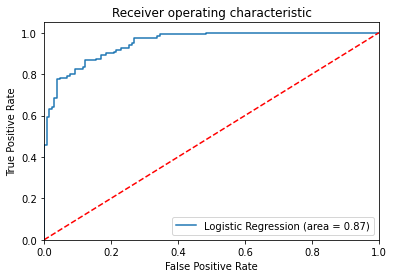

In [23]:
lr_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Summary

Here comes the end of our task where we were asked to choose a dataset then do the Exploratory Data analysis and model, we can now conclude that it was achieved with great results.